In [1]:
%env CUDA_VISIBLE_DEVICES=3

env: CUDA_VISIBLE_DEVICES=3


In [2]:
import sys
sys.path.append('..')
from contrib.DMI.SST.data import *
from contrib.DMI.SST.load_data import *
from src.utils import *
from src.models import *
import matplotlib.pyplot as plt
import torch
import itertools

lon_min = -10
lon_max = 30
lat_min = 48
lat_max = 66

datamodule = BaseDataModule_wgeo(input_da=load_data_wgeo(path_obs="/Odyssey/private/m19beauc/DMI/training_dataset/DMI-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-NSEABALTIC.nc",
                                                      path_tgt="/Odyssey/private/m19beauc/DMI/training_dataset/DMI-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-NSEABALTIC.nc",     
                                                      path_oi="/Odyssey/private/m19beauc/DMI/training_dataset/DMI-L4_GHRSST-SSTfnd-DMI_OI-NSEABALTIC.nc",
                                                      path_topo="/Odyssey/private/m19beauc/DMI/training_dataset/DMI-TOPO_NSEABALTIC.nc",
                                                      path_fgstd="/Odyssey/private/m19beauc/DMI/training_dataset/DMI-FGSTD_NSEABALTIC.nc"),
                            domains={'train': {'time': slice('2019-05-01', '2020-12-31',)},
                                     'val': {'time': [ slice('2021-01-01', '2021-01-31',),
                                                       slice('2021-04-01', '2021-04-30',),
                                                       slice('2021-07-01', '2021-07-31',),
                                                       slice('2021-10-01', '2021-10-31',) ]},
                                     'test': {'time': slice('2021-06-01', '2021-06-30',)}},
                            xrds_kw={'patch_dims': {'time': 7, 'lat': 240, 'lon': 240},
                                     'strides': {'time': 1, 'lat': 5, 'lon': 5},
                                     'strides_test': {'time': 1, 'lat': 200, 'lon': 200},
                                     'domain_limits':  dict(lon=slice(lon_min, lon_max,),
                                                            lat=slice(lat_min, lat_max,)),
                                     },
                            dl_kw={'batch_size': 2, 'num_workers': 0},
                            res=0.02,
                            pads=[False,False,True],
                            norm_stats =[283.8052,4.2381434])
datamodule.setup()
data_loader = datamodule.train_dataloader()
test_dataloader = datamodule.test_dataloader()

ModuleNotFoundError: No module named 'contrib'

In [2]:
import sys
sys.path.append('../..')
from contrib.DMI.SST.data import *
from contrib.DMI.SST.load_data import *
from src.utils import *
from src.models import *

import matplotlib.pyplot as plt
import torch
import itertools

workdir="/dmidata/users/maxb"
workdir="/Odyssey/private/m19beauc/DMI"
lon_min = -10
lon_max = 30
lat_min = 48
lat_max = 66

lon_min = 0
lon_max = 4.8
lat_min = 55
lat_max = 59.8
datamodule = BaseDataModule_wcoarse_wgeo(input_da=load_data_wcoarse_wgeo(path_obs=workdir+"/training_dataset/DMI-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-NSEABALTIC_w4DVarNet_coarse.nc",
  path_tgt=workdir+"/training_dataset/DMI-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-NSEABALTIC_w4DVarNet_coarse.nc",     
  path_oi=workdir+"/training_dataset/DMI-L4_GHRSST-SSTfnd-DMI_OI-NSEABALTIC.nc",
  path_coarse=workdir+"/training_dataset/DMI-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-NSEABALTIC_w4DVarNet_coarse.nc",
  path_topo=workdir+"/training_dataset/DMI-TOPO_NSEABALTIC.nc",
  path_fgstd=workdir+"/training_dataset/DMI-FGSTD_NSEABALTIC.nc"),
              domains={'train': {'time': slice('2019-05-01', '2020-12-31',)},
                                     'val': {'time': [ slice('2021-01-01', '2021-01-31',),
                                                       slice('2021-04-01', '2021-04-30',),
                                                       slice('2021-07-01', '2021-07-31',),
                                                       slice('2021-10-01', '2021-10-31',) ]},
                                     'test': {'time': slice('2021-06-01', '2021-06-30',)}},
                        xrds_kw={'patch_dims': {'time': 7, 'lat': 240, 'lon': 240},
                                     'strides': {'time': 1, 'lat': 5, 'lon': 5},
                                     'strides_test': {'time': 1, 'lat': 200, 'lon': 200},
                                     'domain_limits':  dict(lon=slice(lon_min, lon_max,),
                                                            lat=slice(lat_min, lat_max,)),
                                     },
                            dl_kw={'batch_size': 2, 'num_workers': 0},
                            res=0.02,
                            pads=[False,False,True],
                            norm_stats =[-0.015420883207237286,0.4562528584789277])
datamodule.setup()
data_loader = datamodule.train_dataloader()
test_dataloader = datamodule.test_dataloader()

/homes/m19beauc/miniconda3/envs/4dvarnet/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/homes/m19beauc/4dvarnet-starter/Notebooks/Notebook_DMI/../../contrib/DMI/SST/load_data.py:83: RuntimeWarning: invalid value encountered in log
  'topo':(('lat','lon'),np.log(-1.*topo.topo.data+1)),
/homes/m19beauc/4dvarnet-starter/Notebooks/Notebook_DMI/../../contrib/DMI/SST/data.py:139: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  da_dims = dict(zip(self.da.dims.keys(), self.da.dims.values()))


In [ ]:
import cmocean as cmo
k=30
my_sample = next(itertools.islice(data_loader, k, None))

vmax = 2
vmin = -2.
cmap = plt.cm.seismic
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

fig = plt.figure(figsize=(15,5))
y = my_sample[0]
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),y[0])},
           coords={'time':np.arange(7),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',cmap=cmap,
                                                            col_wrap=7,
                                                            vmin=vmin,vmax=vmax,
                                                            add_colorbar=False)

plt.savefig('/Odyssey/private/m19beauc/more_gappy_inputs.pdf', bbox_inches='tight')


fig = plt.figure(figsize=(15,5))
y = my_sample[1]
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),y[0])},
           coords={'time':np.arange(7),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',cmap=cmap,
                                                            col_wrap=7,
                                                            vmin=vmin,vmax=vmax,
                                                            add_colorbar=False)
plt.savefig('/Odyssey/private/m19beauc/gappy_targets.pdf', bbox_inches='tight')

fig = plt.figure(figsize=(15,2))
# Colorbar
cbar_ax = fig.add_axes([0.1, 0.1, 0.8, 0.1])
cbar_ax.tick_params(labelsize=20)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', pad=3.0)
cbar.ax.set_title("[K]",fontsize=22,y=-3.5)
plt.savefig('/Odyssey/private/m19beauc/standalone_colorbars.pdf', bbox_inches='tight')

# 1. Self attention mechanisms

In [3]:
import torch
from torch import nn
from torch.nn import functional as F
import math

class SelfAttention(nn.Module):
    def __init__(self, n_heads, d_embed, in_proj_bias=True, out_proj_bias=True):
        super().__init__()
        # This combines the Wq, Wk and Wv matrices into one matrix
        self.in_proj = nn.Linear(d_embed, 3 * d_embed, bias=in_proj_bias)
        # This one represents the Wo matrix
        self.out_proj = nn.Linear(d_embed, d_embed, bias=out_proj_bias)
        self.n_heads = n_heads
        self.d_head = d_embed // n_heads

    def forward(self, x, causal_mask=False):
        # x: # (Batch_Size, Seq_Len, Dim)

        # (Batch_Size, Seq_Len, Dim)
        input_shape = x.shape 
        
        # (Batch_Size, Seq_Len, Dim)
        batch_size, sequence_length, d_embed = input_shape 

        # (Batch_Size, Seq_Len, H, Dim / H)
        interim_shape = (batch_size, sequence_length, self.n_heads, self.d_head) 

        # (Batch_Size, Seq_Len, Dim) -> (Batch_Size, Seq_Len, Dim * 3) -> 3 tensor of shape (Batch_Size, Seq_Len, Dim)
        q, k, v = self.in_proj(x).chunk(3, dim=-1)
        
        # (Batch_Size, Seq_Len, Dim) -> (Batch_Size, Seq_Len, H, Dim / H) -> (Batch_Size, H, Seq_Len, Dim / H)
        q = q.view(interim_shape).transpose(1, 2)
        k = k.view(interim_shape).transpose(1, 2)
        v = v.view(interim_shape).transpose(1, 2)

        # (Batch_Size, H, Seq_Len, Dim / H) @ (Batch_Size, H, Dim / H, Seq_Len) -> (Batch_Size, H, Seq_Len, Seq_Len)
        weight = q @ k.transpose(-1, -2)
        
        if causal_mask:
            # Mask where the upper triangle (above the principal diagonal) is 1
            mask = torch.ones_like(weight, dtype=torch.bool).triu(1) 
            # Fill the upper triangle with -inf
            weight.masked_fill_(mask, -torch.inf) 
        
        # Divide by d_k (Dim / H). 
        # (Batch_Size, H, Seq_Len, Seq_Len) -> (Batch_Size, H, Seq_Len, Seq_Len)
        weight /= math.sqrt(self.d_head) 
        # (Batch_Size, H, Seq_Len, Seq_Len) -> (Batch_Size, H, Seq_Len, Seq_Len)
        weight = F.softmax(weight, dim=-1) 
        # (Batch_Size, H, Seq_Len, Seq_Len) @ (Batch_Size, H, Seq_Len, Dim / H) -> (Batch_Size, H, Seq_Len, Dim / H)
        output = weight @ v
        # (Batch_Size, H, Seq_Len, Dim / H) -> (Batch_Size, Seq_Len, H, Dim / H)
        output = output.transpose(1, 2) 
        # (Batch_Size, Seq_Len, H, Dim / H) -> (Batch_Size, Seq_Len, Dim)
        output = output.reshape(input_shape) 
        # (Batch_Size, Seq_Len, Dim) -> (Batch_Size, Seq_Len, Dim)
        output = self.out_proj(output) 
        # (Batch_Size, Seq_Len, Dim)
        return output

class CrossAttention(nn.Module):
    def __init__(self, n_heads, d_embed, d_cross, in_proj_bias=True, out_proj_bias=True):
        super().__init__()
        self.q_proj   = nn.Linear(d_embed, d_embed, bias=in_proj_bias)
        self.k_proj   = nn.Linear(d_cross, d_embed, bias=in_proj_bias)
        self.v_proj   = nn.Linear(d_cross, d_embed, bias=in_proj_bias)
        self.out_proj = nn.Linear(d_embed, d_embed, bias=out_proj_bias)
        self.n_heads = n_heads
        self.d_head = d_embed // n_heads
    
    def forward(self, x, y):
        # x (latent): # (Batch_Size, Seq_Len_Q, Dim_Q)
        # y (context): # (Batch_Size, Seq_Len_KV, Dim_KV) = (Batch_Size, 77, 768)

        input_shape = x.shape
        batch_size, sequence_length, d_embed = input_shape
        # Divide each embedding of Q into multiple heads such that d_heads * n_heads = Dim_Q
        interim_shape = (batch_size, -1, self.n_heads, self.d_head)
        
        # (Batch_Size, Seq_Len_Q, Dim_Q) -> (Batch_Size, Seq_Len_Q, Dim_Q)
        q = self.q_proj(x)
        # (Batch_Size, Seq_Len_KV, Dim_KV) -> (Batch_Size, Seq_Len_KV, Dim_Q)
        k = self.k_proj(y)
        # (Batch_Size, Seq_Len_KV, Dim_KV) -> (Batch_Size, Seq_Len_KV, Dim_Q)
        v = self.v_proj(y)

        # (Batch_Size, Seq_Len_Q, Dim_Q) -> (Batch_Size, Seq_Len_Q, H, Dim_Q / H) -> (Batch_Size, H, Seq_Len_Q, Dim_Q / H)
        q = q.view(interim_shape).transpose(1, 2) 
        # (Batch_Size, Seq_Len_KV, Dim_Q) -> (Batch_Size, Seq_Len_KV, H, Dim_Q / H) -> (Batch_Size, H, Seq_Len_KV, Dim_Q / H)
        k = k.view(interim_shape).transpose(1, 2) 
        # (Batch_Size, Seq_Len_KV, Dim_Q) -> (Batch_Size, Seq_Len_KV, H, Dim_Q / H) -> (Batch_Size, H, Seq_Len_KV, Dim_Q / H)
        v = v.view(interim_shape).transpose(1, 2) 
        
        # (Batch_Size, H, Seq_Len_Q, Dim_Q / H) @ (Batch_Size, H, Dim_Q / H, Seq_Len_KV) -> (Batch_Size, H, Seq_Len_Q, Seq_Len_KV)
        weight = q @ k.transpose(-1, -2)
        # (Batch_Size, H, Seq_Len_Q, Seq_Len_KV)
        weight /= math.sqrt(self.d_head)
        # (Batch_Size, H, Seq_Len_Q, Seq_Len_KV)
        weight = F.softmax(weight, dim=-1)
        # (Batch_Size, H, Seq_Len_Q, Seq_Len_KV) @ (Batch_Size, H, Seq_Len_KV, Dim_Q / H) -> (Batch_Size, H, Seq_Len_Q, Dim_Q / H)
        output = weight @ v
        # (Batch_Size, H, Seq_Len_Q, Dim_Q / H) -> (Batch_Size, Seq_Len_Q, H, Dim_Q / H)
        output = output.transpose(1, 2).contiguous()
        # (Batch_Size, Seq_Len_Q, H, Dim_Q / H) -> (Batch_Size, Seq_Len_Q, Dim_Q)
        output = output.view(input_shape)
        # (Batch_Size, Seq_Len_Q, Dim_Q) -> (Batch_Size, Seq_Len_Q, Dim_Q)
        output = self.out_proj(output)
        # (Batch_Size, Seq_Len_Q, Dim_Q)
        return output

# 2. VAE architectures

In [4]:
###############################################################################
# BSD 3-Clause License
#
# Copyright (c) 2018, NVIDIA CORPORATION. All rights reserved.
#
# Author & Contact: Guilin Liu (guilinl@nvidia.com)
###############################################################################

import torch
import torch.nn.functional as F
from torch import nn, cuda
from torch.autograd import Variable

class PConv2d(nn.Conv2d):
    def __init__(self, *args, **kwargs):

        # whether the mask is multi-channel or not
        if 'multi_channel' in kwargs:
            self.multi_channel = kwargs['multi_channel']
            kwargs.pop('multi_channel')
        else:
            self.multi_channel = False  

        if 'return_mask' in kwargs:
            self.return_mask = kwargs['return_mask']
            kwargs.pop('return_mask')
        else:
            self.return_mask = False

        super(PConv2d, self).__init__(*args, **kwargs)

        if self.multi_channel:
            self.weight_maskUpdater = torch.ones(self.out_channels, self.in_channels, self.kernel_size[0], self.kernel_size[1])
        else:
            self.weight_maskUpdater = torch.ones(1, 1, self.kernel_size[0], self.kernel_size[1])
            
        self.slide_winsize = self.weight_maskUpdater.shape[1] * self.weight_maskUpdater.shape[2] * self.weight_maskUpdater.shape[3]

        self.last_size = (None, None, None, None)
        self.update_mask = None
        self.mask_ratio = None

    def forward(self, input, mask_in=None):
        assert len(input.shape) == 4
        if mask_in is not None or self.last_size != tuple(input.shape):
            self.last_size = tuple(input.shape)

            with torch.no_grad():
                if self.weight_maskUpdater.type() != input.type():
                    self.weight_maskUpdater = self.weight_maskUpdater.to(input)

                if mask_in is None:
                    # if mask is not provided, create a mask
                    if self.multi_channel:
                        mask = torch.ones(input.data.shape[0], input.data.shape[1], input.data.shape[2], input.data.shape[3]).to(input)
                    else:
                        mask = torch.ones(1, 1, input.data.shape[2], input.data.shape[3]).to(input)
                else:
                    mask = mask_in
                        
                self.update_mask = F.conv2d(mask, self.weight_maskUpdater, bias=None, stride=self.stride, padding=self.padding, dilation=self.dilation, groups=1)

                # for mixed precision training, change 1e-8 to 1e-6
                self.mask_ratio = self.slide_winsize/(self.update_mask + 1e-8)
                # self.mask_ratio = torch.max(self.update_mask)/(self.update_mask + 1e-8)
                self.update_mask = torch.clamp(self.update_mask, 0, 1)
                self.mask_ratio = torch.mul(self.mask_ratio, self.update_mask)


        raw_out = super(PConv2d, self).forward(torch.mul(input, mask) if mask_in is not None else input)

        if self.bias is not None:
            bias_view = self.bias.view(1, self.out_channels, 1, 1)
            output = torch.mul(raw_out - bias_view, self.mask_ratio) + bias_view
            output = torch.mul(output, self.update_mask)
        else:
            output = torch.mul(raw_out, self.mask_ratio)


        if self.return_mask:
            return output, self.update_mask
        else:
            return output

In [5]:
import torch
from torch import nn
from torch.nn import functional as F

class VAE_PAttentionBlock(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.groupnorm = nn.GroupNorm(32, channels)
        self.attention = SelfAttention(1, 2*channels)
    
    def forward(self, x, mask):
        # x: (Batch_Size, Features, Height, Width)

        residue = x 

        # (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height, Width)
        x = self.groupnorm(x)
        x = torch.cat([x,mask], dim=1)
        
        n, c, h, w = x.shape
        
        # (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height * Width)
        x = x.view((n, c, h * w)) 
        # (Batch_Size, Features, Height * Width) -> (Batch_Size, Height * Width, Features). Each pixel becomes a feature of size "Features", the sequence length is "Height * Width".
        x = x.transpose(-1, -2)
        # Perform self-attention WITHOUT mask
        # (Batch_Size, Height * Width, Features) -> (Batch_Size, Height * Width, Features)
        x = self.attention(x)
        # (Batch_Size, Height * Width, Features) -> (Batch_Size, Features, Height * Width)
        x = x.transpose(-1, -2)
        # (Batch_Size, Features, Height * Width) -> (Batch_Size, Features, Height, Width)
        x = x.view((n, c, h, w))
        x, mask = x[:,:(c//2),:,:] , mask
        # (Batch_Size, Features, Height, Width) + (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height, Width) 
        x += residue

        # (Batch_Size, Features, Height, Width)
        return x, mask

class VAE_PResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.groupnorm_1 = nn.GroupNorm(32, in_channels)
        self.conv_1 = PConv2d(in_channels, out_channels, kernel_size=3, padding=1, multi_channel=True, return_mask=True)

        self.groupnorm_2 = nn.GroupNorm(32, out_channels)
        self.conv_2 = PConv2d(out_channels, out_channels, kernel_size=3, padding=1, multi_channel=True,return_mask=True)

        if in_channels == out_channels:
            self.residual_layer = nn.Identity()
        else:
            self.residual_layer = PConv2d(in_channels, out_channels, kernel_size=1, padding=0, multi_channel=True, return_mask=True)
    
    def forward(self, x, mask):
        # x: (Batch_Size, In_Channels, Height, Width)

        residue = x
        residue_mask = mask
                
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, In_Channels, Height, Width)
        x = self.groupnorm_1(x)
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, In_Channels, Height, Width)
        x = F.silu(x)
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x, mask = self.conv_1(x, mask)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x = self.groupnorm_2(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x = F.silu(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x, mask = self.conv_2(x, mask)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        if isinstance(self.residual_layer,nn.Identity):
            return x + self.residual_layer(residue), mask
        else:
            res, mask = self.residual_layer(residue, residue_mask)
            return x + res, mask

class VAE_AttentionBlock(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.groupnorm = nn.GroupNorm(32, channels)
        self.attention = SelfAttention(1, channels)
    
    def forward(self, x):
        # x: (Batch_Size, Features, Height, Width)

        residue = x 

        # (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height, Width)
        x = self.groupnorm(x)
        
        n, c, h, w = x.shape
        # (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height * Width)
        x = x.view((n, c, h * w)) 
        # (Batch_Size, Features, Height * Width) -> (Batch_Size, Height * Width, Features). Each pixel becomes a feature of size "Features", the sequence length is "Height * Width".
        x = x.transpose(-1, -2)
        # Perform self-attention WITHOUT mask
        # (Batch_Size, Height * Width, Features) -> (Batch_Size, Height * Width, Features)
        x = self.attention(x)
        # (Batch_Size, Height * Width, Features) -> (Batch_Size, Features, Height * Width)
        x = x.transpose(-1, -2)
        # (Batch_Size, Features, Height * Width) -> (Batch_Size, Features, Height, Width)
        x = x.view((n, c, h, w))
        # (Batch_Size, Features, Height, Width) + (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height, Width) 
        x += residue

        # (Batch_Size, Features, Height, Width)
        return x

class VAE_ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.groupnorm_1 = nn.GroupNorm(32, in_channels)
        self.conv_1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)

        self.groupnorm_2 = nn.GroupNorm(32, out_channels)
        self.conv_2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)

        if in_channels == out_channels:
            self.residual_layer = nn.Identity()
        else:
            self.residual_layer = nn.Conv2d(in_channels, out_channels, kernel_size=1, padding=0)
            
    def forward(self, x):
        # x: (Batch_Size, In_Channels, Height, Width)

        residue = x
                
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, In_Channels, Height, Width)
        x = self.groupnorm_1(x)
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, In_Channels, Height, Width)
        x = F.silu(x)
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x  = self.conv_1(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x = self.groupnorm_2(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x = F.silu(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x = self.conv_2(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)

        return x + self.residual_layer(residue)

    
class VAE_Encoder(nn.Sequential):
    def __init__(self, in_channels=9, out_channels=28):
        super().__init__(
            # (Batch_Size, Channel, Height, Width) -> (Batch_Size, 128, Height, Width)
            PConv2d(in_channels, 128, kernel_size=3, padding=1,multi_channel=True, return_mask=True),  
             # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            VAE_PResidualBlock(128, 128),
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            VAE_PResidualBlock(128, 128),
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height / 2, Width / 2)
            PConv2d(128, 128, kernel_size=3, stride=2, padding=0, multi_channel=True,return_mask=True),
            # (Batch_Size, 128, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 2, Width / 2)
            VAE_PResidualBlock(128, 256), 
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 2, Width / 2)
            #VAE_PResidualBlock(256, 256), 
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 4, Width / 4)
            PConv2d(256, 256, kernel_size=3, stride=2, padding=0,multi_channel=True, return_mask=True), 
            # (Batch_Size, 256, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            VAE_PResidualBlock(256, 512), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            #VAE_PResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 8, Width / 8)
            #PConv2d(512, 512, kernel_size=3, stride=2, padding=0,multi_channel=True, return_mask=True), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            #VAE_PResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            #VAE_PResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_PResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_PAttentionBlock(512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_PResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.GroupNorm(32, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.SiLU(), 

            # Because the padding=1, it means the width and height will increase by 2
            # Out_Height = In_Height + Padding_Top + Padding_Bottom
            # Out_Width = In_Width + Padding_Left + Padding_Right
            # Since padding = 1 means Padding_Top = Padding_Bottom = Padding_Left = Padding_Right = 1,
            # Since the Out_Width = In_Width + 2 (same for Out_Height), it will compensate for the Kernel size of 3
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 8, Height / 8, Width / 8). 
            PConv2d(512, out_channels, kernel_size=3, padding=1, multi_channel=True,return_mask=True), 

            # (Batch_Size, 8, Height / 8, Width / 8) -> (Batch_Size, 8, Height / 8, Width / 8)
            PConv2d(out_channels, out_channels, kernel_size=1, padding=0, multi_channel=True, return_mask=True), 
        )

    def forward(self, x):
        # x: (Batch_Size, Channel, Height, Width)
        # noise: (Batch_Size, 4, Height / 8, Width / 8)

        mask = torch.where(x==0.,0.,1.)
        
        for module in self:

            if getattr(module, 'stride', None) == (2, 2):  # Padding at downsampling should be asymmetric (see #8)
                # Pad: (Padding_Left, Padding_Right, Padding_Top, Padding_Bottom).
                # Pad with zeros on the right and bottom.
                # (Batch_Size, Channel, Height, Width) -> (Batch_Size, Channel, Height + Padding_Top + Padding_Bottom, Width + Padding_Left + Padding_Right) = (Batch_Size, Channel, Height + 1, Width + 1)
                x = F.pad(x, (0, 1, 0, 1))
                mask = F.pad(mask, (0, 1, 0, 1))
                
            if (isinstance(module, nn.GroupNorm) or isinstance(module, nn.SiLU)):
                x = module(x)
            else:
                x, mask = module(x,mask)
        
        # (Batch_Size, 8, Height / 8, Width / 8) -> two tensors of shape (Batch_Size, 4, Height / 8, Width / 8)
        mean, log_variance = torch.chunk(x, 2, dim=1)
        
        # Clamp the log variance between -30 and 20, so that the variance is between (circa) 1e-14 and 1e8. 
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        log_variance = torch.clamp(log_variance, -30, 20)
        
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        variance = log_variance.exp()
        
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        stdev = variance.sqrt()
        
        # reparametrization trick: Transform N(0, 1) -> N(mean, stdev) 
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        noise = torch.Tensor(np.random.normal(size=mean.size(), scale=1.0)).to(x.device)
        x = mean + stdev * noise
        
        # Scale by a constant
        # Constant taken from: https://github.com/CompVis/stable-diffusion/blob/21f890f9da3cfbeaba8e2ac3c425ee9e998d5229/configs/stable-diffusion/v1-inference.yaml#L17C1-L17C1
        x *= 0.18215
                
        return x, mean, log_variance

class VAE_Decoder(nn.Sequential):
    def __init__(self,in_channels=14, out_channels=9):
        super().__init__(
            # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
            nn.Conv2d(in_channels, 4, kernel_size=1, padding=0),
            # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.Conv2d(4, 512, kernel_size=3, padding=1),   
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_AttentionBlock(512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            #VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            #VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            #VAE_ResidualBlock(512, 512), 
            # Repeats the rows and columns of the data by scale_factor (like when you resize an image by doubling its size).
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 4, Width / 4)
            #nn.Upsample(scale_factor=2),
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            nn.Conv2d(512, 512, kernel_size=3, padding=1), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            #VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            #VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 2, Width / 2)
            nn.Upsample(scale_factor=2), 
            # (Batch_Size, 512, Height / 2, Width / 2) -> (Batch_Size, 512, Height / 2, Width / 2)
            nn.Conv2d(512, 512, kernel_size=3, padding=1), 
            # (Batch_Size, 512, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 2, Width / 2)
            VAE_ResidualBlock(512, 256), 
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 2, Width / 2)
            VAE_ResidualBlock(256, 256), 
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 2, Width / 2)
            #VAE_ResidualBlock(256, 256), 
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height, Width)
            nn.Upsample(scale_factor=2), 
            # (Batch_Size, 256, Height, Width) -> (Batch_Size, 256, Height, Width)
            nn.Conv2d(256, 256, kernel_size=3, padding=1), 
            # (Batch_Size, 256, Height, Width) -> (Batch_Size, 128, Height, Width)
            VAE_ResidualBlock(256, 128), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            VAE_ResidualBlock(128, 128), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            VAE_ResidualBlock(128, 128), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            nn.GroupNorm(32, 128), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            nn.SiLU(), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 3, Height, Width)
            nn.Conv2d(128, out_channels, kernel_size=3, padding=1), 
        )

    def forward(self, x):
        # x: (Batch_Size, 4, Height / 8, Width / 8)
        
        # Remove the scaling added by the Encoder.
        x /= 0.18215

        for module in self:
            x = module(x)

        # (Batch_Size, 3, Height, Width)
        return x

In [6]:
class VAE_Encoder(nn.Sequential):
    def __init__(self, in_channels=9, out_channels=28):
        super().__init__(
            # (Batch_Size, Channel, Height, Width) -> (Batch_Size, 128, Height, Width)
            PConv2d(in_channels, 24, kernel_size=3, padding=1,multi_channel=True, return_mask=True),      
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height / 2, Width / 2)
            PConv2d(24, 48, kernel_size=3, stride=2, padding=0, multi_channel=True,return_mask=True),
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 4, Width / 4)
            PConv2d(48, 96, kernel_size=3, stride=2, padding=0,multi_channel=True, return_mask=True), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 8, Width / 8)
            PConv2d(96, 192, kernel_size=3, stride=2, padding=0,multi_channel=True, return_mask=True), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.GroupNorm(12, 192), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.SiLU(), 
            # Because the padding=1, it means the width and height will increase by 2
            # Out_Height = In_Height + Padding_Top + Padding_Bottom
            # Out_Width = In_Width + Padding_Left + Padding_Right
            # Since padding = 1 means Padding_Top = Padding_Bottom = Padding_Left = Padding_Right = 1,
            # Since the Out_Width = In_Width + 2 (same for Out_Height), it will compensate for the Kernel size of 3
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 8, Height / 8, Width / 8). 
            PConv2d(192, out_channels, kernel_size=3, padding=1, multi_channel=True,return_mask=True), 
            # (Batch_Size, 8, Height / 8, Width / 8) -> (Batch_Size, 8, Height / 8, Width / 8)
            PConv2d(out_channels, out_channels, kernel_size=1, padding=0, multi_channel=True, return_mask=True), 
        )

    def forward(self, x):
        # x: (Batch_Size, Channel, Height, Width)
        # noise: (Batch_Size, 4, Height / 8, Width / 8)

        mask = torch.where(x==0.,0.,1.)
        
        for module in self:

            if getattr(module, 'stride', None) == (2, 2):  # Padding at downsampling should be asymmetric (see #8)
                # Pad: (Padding_Left, Padding_Right, Padding_Top, Padding_Bottom).
                # Pad with zeros on the right and bottom.
                # (Batch_Size, Channel, Height, Width) -> (Batch_Size, Channel, Height + Padding_Top + Padding_Bottom, Width + Padding_Left + Padding_Right) = (Batch_Size, Channel, Height + 1, Width + 1)
                x = F.pad(x, (0, 1, 0, 1))
                mask = F.pad(mask, (0, 1, 0, 1))
                
            if (isinstance(module, nn.GroupNorm) or isinstance(module, nn.SiLU)):
                x = module(x)
            else:
                x, mask = module(x,mask)
        
        # (Batch_Size, 8, Height / 8, Width / 8) -> two tensors of shape (Batch_Size, 4, Height / 8, Width / 8)
        mean, log_variance = torch.chunk(x, 2, dim=1)
        
        # Clamp the log variance between -30 and 20, so that the variance is between (circa) 1e-14 and 1e8. 
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        log_variance = torch.clamp(log_variance, -30, 20)
        
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        variance = log_variance.exp()
        
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        stdev = variance.sqrt()
        
        # reparametrization trick: Transform N(0, 1) -> N(mean, stdev) 
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        noise = torch.Tensor(np.random.normal(size=mean.size(), scale=1.0)).to(x.device)
        x = mean + stdev * noise
        
        # Scale by a constant
        # Constant taken from: https://github.com/CompVis/stable-diffusion/blob/21f890f9da3cfbeaba8e2ac3c425ee9e998d5229/configs/stable-diffusion/v1-inference.yaml#L17C1-L17C1
        x *= 0.18215
                
        return x, mean, log_variance

class VAE_Decoder(nn.Sequential):
    def __init__(self,in_channels=14, out_channels=9):
        super().__init__(
            # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
            nn.Conv2d(in_channels, 4, kernel_size=1, padding=0),
            # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.Conv2d(4, 192, kernel_size=3, padding=1),   
            nn.Upsample(scale_factor=2),
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            nn.Conv2d(192, 96, kernel_size=3, padding=1), 
            nn.Upsample(scale_factor=2), 
            # (Batch_Size, 512, Height / 2, Width / 2) -> (Batch_Size, 512, Height / 2, Width / 2)
            nn.Conv2d(96, 48, kernel_size=3, padding=1), 
            nn.Upsample(scale_factor=2), 
            # (Batch_Size, 256, Height, Width) -> (Batch_Size, 256, Height, Width)
            nn.Conv2d(48, 48, kernel_size=3, padding=1), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            nn.GroupNorm(12, 48), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            nn.SiLU(), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 3, Height, Width)
            nn.Conv2d(48, out_channels, kernel_size=3, padding=1), 
        )

    def forward(self, x):
        # x: (Batch_Size, 4, Height / 8, Width / 8)
        
        # Remove the scaling added by the Encoder.
        x /= 0.18215

        for module in self:
            x = module(x)

        # (Batch_Size, 3, Height, Width)
        return x

In [7]:
class AE_Encoder(nn.Sequential):
    def __init__(self, in_channels=9, out_channels=28):
        super().__init__(
            # (Batch_Size, Channel, Height, Width) -> (Batch_Size, 128, Height, Width)
            PConv2d(in_channels, 24, kernel_size=3, padding=1,multi_channel=True, return_mask=True),      
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height / 2, Width / 2)
            PConv2d(24, 48, kernel_size=3, stride=2, padding=0, multi_channel=True,return_mask=True),
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 4, Width / 4)
            PConv2d(48, 96, kernel_size=3, stride=2, padding=0,multi_channel=True, return_mask=True), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 8, Width / 8)
            PConv2d(96, 192, kernel_size=3, stride=2, padding=0,multi_channel=True, return_mask=True), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.GroupNorm(12, 192), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.SiLU(), 
            # Because the padding=1, it means the width and height will increase by 2
            # Out_Height = In_Height + Padding_Top + Padding_Bottom
            # Out_Width = In_Width + Padding_Left + Padding_Right
            # Since padding = 1 means Padding_Top = Padding_Bottom = Padding_Left = Padding_Right = 1,
            # Since the Out_Width = In_Width + 2 (same for Out_Height), it will compensate for the Kernel size of 3
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 8, Height / 8, Width / 8). 
            PConv2d(192, out_channels, kernel_size=3, padding=1, multi_channel=True,return_mask=True), 
            # (Batch_Size, 8, Height / 8, Width / 8) -> (Batch_Size, 8, Height / 8, Width / 8)
            PConv2d(out_channels, out_channels, kernel_size=1, padding=0, multi_channel=True, return_mask=True), 
        )

    def forward(self, x):
        # x: (Batch_Size, Channel, Height, Width)
        # noise: (Batch_Size, 4, Height / 8, Width / 8)

        mask = torch.where(x==0.,0.,1.)
        
        for module in self:

            if getattr(module, 'stride', None) == (2, 2):  # Padding at downsampling should be asymmetric (see #8)
                # Pad: (Padding_Left, Padding_Right, Padding_Top, Padding_Bottom).
                # Pad with zeros on the right and bottom.
                # (Batch_Size, Channel, Height, Width) -> (Batch_Size, Channel, Height + Padding_Top + Padding_Bottom, Width + Padding_Left + Padding_Right) = (Batch_Size, Channel, Height + 1, Width + 1)
                x = F.pad(x, (0, 1, 0, 1))
                mask = F.pad(mask, (0, 1, 0, 1))
                
            if (isinstance(module, nn.GroupNorm) or isinstance(module, nn.SiLU)):
                x = module(x)
            else:
                x, mask = module(x,mask)
                
        return x

class AE_Decoder(nn.Sequential):
    def __init__(self,in_channels=14, out_channels=9):
        super().__init__(
            # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
            nn.Conv2d(in_channels, 4, kernel_size=1, padding=0),
            # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.Conv2d(4, 192, kernel_size=3, padding=1),   
            nn.Upsample(scale_factor=2),
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            nn.Conv2d(192, 96, kernel_size=3, padding=1), 
            nn.Upsample(scale_factor=2), 
            # (Batch_Size, 512, Height / 2, Width / 2) -> (Batch_Size, 512, Height / 2, Width / 2)
            nn.Conv2d(96, 48, kernel_size=3, padding=1), 
            nn.Upsample(scale_factor=2), 
            # (Batch_Size, 256, Height, Width) -> (Batch_Size, 256, Height, Width)
            nn.Conv2d(48, 48, kernel_size=3, padding=1), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            nn.GroupNorm(12, 48), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            nn.SiLU(), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 3, Height, Width)
            nn.Conv2d(48, out_channels, kernel_size=3, padding=1), 
        )

    def forward(self, x):
        # x: (Batch_Size, 4, Height / 8, Width / 8)
        
        # Remove the scaling added by the Encoder.
        #x /= 0.18215

        for module in self:
            x = module(x)

        # (Batch_Size, 3, Height, Width)
        return x

# VAE model

In [19]:
device='cuda'
from kornia.filters import sobel

class VAE(nn.Sequential):
    def __init__(self,in_channels=9, out_channels=28):
        super().__init__()
        self.encoder = VAE_Encoder(in_channels, out_channels).to(device)
        self.decoder = VAE_Decoder(out_channels//2,in_channels-5).to(device)
        
    def vae_loss(self, x, x_hat, mean, log_var, wKL=.01):
        err = x_hat-x
        err_grad = sobel(x_hat)-sobel(x)
        mask = torch.isnan(err)
        mask_grad = torch.isnan(err_grad)
        zeros= torch.zeros(err.size()).to(device)
        
        
        reproduction_loss = nn.functional.mse_loss(err[~mask], zeros[~mask], reduction='mean')
        #reproduction_loss = nn.functional.l1_loss(err[~mask], zeros[~mask], reduction='mean')

        #log_sigma_opt = 0.5 * reproduction_loss.log()
        grad_reproduction_loss = nn.functional.mse_loss(err_grad[~mask_grad], zeros[~mask_grad], reduction='mean')
        #log_sigma_opt_grad = 0.5 * grad_reproduction_loss.log()
        
        #reproduction_loss = 0.5 * torch.pow(err[~mask]/log_sigma_opt.exp(), 2) + log_sigma_opt
        #reproduction_loss = reproduction_loss.sum()
        #grad_reproduction_loss = 0.5 * torch.pow(err_grad[~mask]/log_sigma_opt_grad.exp(), 2) + log_sigma_opt_grad
        #grad_reproduction_loss = grad_reproduction_loss.sum()        
        
        KLD = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())
        #return reproduction_loss + 100.*grad_reproduction_loss + wKL*KLD, reproduction_loss, KLD
        return reproduction_loss  + wKL*KLD, reproduction_loss, KLD
        #return reproduction_loss, reproduction_loss, KLD

   
    def forward(self, x):
        # encoder
        z, mean, log_var = self.encoder(x)
        # decoder
        x_hat = self.decoder(z)
        return x_hat
        
vae = VAE(in_channels=7+5, out_channels=14)

# AE model

In [81]:
device='cuda'
from kornia.filters import sobel

class AE(nn.Sequential):
    def __init__(self,in_channels=9, out_channels=28):
        super().__init__()
        self.encoder = AE_Encoder(in_channels, out_channels).to(device)
        self.decoder = AE_Decoder(out_channels, in_channels-5).to(device)
        
    def ae_loss(self, x, x_hat):
        
        err = x_hat-x
        err_grad = sobel(x_hat)-sobel(x)
        mask = torch.isnan(err)
        mask_grad = torch.isnan(err_grad)
        zeros= torch.zeros(err.size()).to(device)
        
        reproduction_loss = nn.functional.mse_loss(err[~mask], zeros[~mask], reduction='mean')
        grad_reproduction_loss = nn.functional.mse_loss(err_grad[~mask_grad], zeros[~mask_grad], reduction='mean')
        
        return reproduction_loss + 100.*grad_reproduction_loss
   
    def forward(self, x):
        # encoder
        z = self.encoder(x)
        # decoder
        x_hat = self.decoder(z)
        return x_hat
        
ae = AE(in_channels=1+5, out_channels=50)

# VAE Training

In [68]:
ckpt = torch.load('/homes/m19beauc/4dvarnet-starter/ckpt/DMI/ckpt_vae_dmi.pth', map_location=device)
vae.load_state_dict(ckpt)

<All keys matched successfully>

In [ ]:
#@title Training (double click to expand or collapse)

from IPython.display import clear_output
from torch.optim import Adam
from tqdm.autonotebook import tqdm
from kornia.filters import box_blur

n_epochs =  1000#@param {'type':'integer'}
## learning rate
lr = 1e-3 #@param {'type':'number'}

optimizer = Adam(
        [
            #{"params": vae.encoder.parameters(), "lr": lr},
            #{"params": vae.decoder.parameters(), "lr": lr},
            {"params": vae.parameters(), "lr": lr}
        ],
    )

def norm(x):
    return (x-0.015)/0.46


tqdm_epoch = tqdm(range(n_epochs))
for epoch in tqdm_epoch:
  avg_loss = 0.
  num_items = 0
  for batch in data_loader:

    y = batch[0]
    x = batch[1]
    if x.isfinite().float().mean() < 0.5:
        continue
        
    #x = norm(batch[2]-box_blur(batch[2], (35, 35)))
    #y = torch.where(torch.isnan(batch[0]),np.nan,x)
    #x = torch.where(torch.isnan(batch[1]),np.nan,x)
    #if x.isfinite().float().mean() < 0.5:
    #    continue
    
    #x_false = norm(batch[2]-box_blur(batch[2], (35, 35)))
    #x = torch.where(torch.isnan(batch[1]),x_false,x)
    
    y = y.nan_to_num().to(device)
    geo = torch.stack((batch.latv[:,0].nan_to_num(),
                                  batch.lonv[:,0].nan_to_num(),
                                  batch.land_mask[:,0].nan_to_num(),
                                  batch.topo[:,0].nan_to_num(),
                                  batch.fg_std[:,0].nan_to_num()), dim=1).to(device)
    inp = torch.cat((y, geo),dim=1)
    z, mean, log_var = vae.encoder(inp)
    x_hat = vae.decoder(z)
    #0.00000001
    loss_vae, rec, KL = vae.vae_loss(x.to(device), x_hat, mean, log_var, wKL=0.0000001)
    loss = loss_vae
    err_grad = sobel(x_hat)-sobel(x.to(device))
    mask_grad = torch.isnan(err_grad)
    zeros= torch.zeros(x.size()).to(device)
    grad_rec = nn.functional.mse_loss(err_grad[~mask_grad], zeros[~mask_grad], reduction='mean')
    print(rec, grad_rec, 0.0000001*KL)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    avg_loss += loss.item() * x.shape[0]
    num_items += x.shape[0]
  # Print the averaged training loss so far.
  tqdm_epoch.set_description('Average Loss: {:5f}'.format(avg_loss / num_items))
  # Update the checkpoint after each epoch of training.
  torch.save(vae.state_dict(), '../../ckpt/DMI/ckpt_vae_dmi_real.pth')

  0%|                                                  | 0/1000 [00:00<?, ?it/s]

tensor(0.2912, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0408, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3876, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0350, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(33.0168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0436, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0679, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0417, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.3482, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0477, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0521, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5813, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1765, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0700, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(1.2536, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0512, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0321, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0380, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0263, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0454, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0263, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0441, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)


Average Loss: 0.432169:   0%|               | 1/1000 [00:56<15:42:45, 56.62s/it]

tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0628, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MulBackward0>)
tensor(14.8150, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.0490, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0349, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0700, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MulBackward0>)
tensor(15.0101, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0763, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0795, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3653, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1765, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0361, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0223, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0284, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0221, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0494, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0412, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0359, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0395, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0341, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 1.180762:   0%|               | 2/1000 [01:53<15:40:31, 56.54s/it]

tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2620, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0592, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0258, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0617, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0375, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0717, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0387, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0479, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0393, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4083, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0150, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6086, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4217, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.248652:   0%|               | 3/1000 [02:49<15:38:49, 56.50s/it]

tensor(0.2701, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0453, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1761, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0767, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0605, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8590, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(1.5238, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2027, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2309, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1372, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0528, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7145, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0587, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.1281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0431, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0563, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2268, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0421, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2154, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.615425:   0%|               | 4/1000 [03:46<15:41:50, 56.74s/it]

tensor(0.0472, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0336, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0599, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0642, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0540, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.2761, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(47.7250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0566, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0660, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0455, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0488, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0339, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0642, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0354, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0392, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0509, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0565, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(20.0638, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0428, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0481, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0492, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0400, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>)

Average Loss: 0.562325:   0%|               | 5/1000 [04:43<15:39:43, 56.67s/it]

tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0335, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0390, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0494, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0553, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0680, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1911, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0650, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0223, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0598, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0384, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1858, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0761, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0546, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.5744, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2626, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.269722:   1%|               | 6/1000 [05:39<15:36:14, 56.51s/it]

tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0276, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1464, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2046, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0550, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0403, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2753, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(61.6183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(14.7182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0275, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0391, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0203, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0382, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0520, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0427, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0296, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0641, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0338, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1756, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0315, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.880081:   1%|               | 7/1000 [06:35<15:34:15, 56.45s/it]

tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0481, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0258, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1501, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0223, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2443, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8692, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0359, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0330, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0482, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0276, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0633, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0374, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3969, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0285, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.136069:   1%|               | 7/1000 [07:32<15:34:15, 56.45s/it]

tensor(0.4476, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)


Average Loss: 0.136069:   1%|               | 8/1000 [07:32<15:34:30, 56.52s/it]

tensor(0.0297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0211, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0537, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1652, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4386, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7899, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.2078, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0400, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0593, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5937, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0620, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0271, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0347, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0487, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.431425:   1%|               | 8/1000 [08:29<15:34:30, 56.52s/it]

tensor(0.0531, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0454, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)


Average Loss: 0.431425:   1%|▏              | 9/1000 [08:29<15:35:50, 56.66s/it]

tensor(0.0394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0452, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0521, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4741, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0529, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0335, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0171, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0383, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0611, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2094, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(1.5022, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0386, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0487, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0423, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0578, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2584, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0362, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0541, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2408, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0480, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1980, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0440, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0261, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.392357:   1%|▏              | 9/1000 [09:26<15:35:50, 56.66s/it]

tensor(0.0392, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)


Average Loss: 0.392357:   1%|▏             | 10/1000 [09:26<15:34:57, 56.66s/it]

tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3828, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0163, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0759, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2390, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2329, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0513, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0535, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0269, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0210, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.7107, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0263, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0361, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3079, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0292, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0423, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0428, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0211, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0616, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.389045:   1%|▏             | 11/1000 [10:22<15:33:40, 56.64s/it]

tensor(0.0304, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0364, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0358, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0382, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0372, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2725, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2900, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0185, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0330, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0529, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0588, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0601, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.6375, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0348, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0329, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0441, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0651, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0371, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0135, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.275683:   1%|▏             | 11/1000 [11:18<15:33:40, 56.64s/it]

tensor(0.0455, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.5413, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)


Average Loss: 0.275683:   1%|▏             | 12/1000 [11:19<15:31:21, 56.56s/it]

tensor(0.0883, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0462, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0389, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0419, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0318, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2506, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0672, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0628, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0376, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0348, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2842, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0353, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(1.6995, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1896, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4601, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0516, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(1.3756, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1029, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1154, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1673, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4413, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.788578:   1%|▏             | 13/1000 [12:15<15:29:16, 56.49s/it]

tensor(0.0401, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6446, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8956, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0348, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0370, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0428, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.5233, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0594, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0209, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0680, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0381, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0385, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.1696, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0193, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0170, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0461, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0382, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0408, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0845, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2166, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.528859:   1%|▏             | 14/1000 [13:11<15:29:03, 56.54s/it]

tensor(0.0303, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0457, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0546, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0440, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0439, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0408, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3984, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2991, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2434, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2106, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0619, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0330, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0383, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0154, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.2012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8296, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0865, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0351, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.840107:   1%|▏             | 14/1000 [14:08<15:29:03, 56.54s/it]

tensor(0.0205, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)


Average Loss: 0.840107:   2%|▏             | 15/1000 [14:08<15:29:00, 56.59s/it]

tensor(0.0350, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0275, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6686, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(27.9519, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0887, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.0193, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2137, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0418, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0215, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0558, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0649, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0266, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0318, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0425, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2895, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0411, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0309, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0082, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0631, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.669078:   2%|▏             | 16/1000 [15:05<15:28:20, 56.61s/it]

tensor(0.0342, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3977, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5417, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0466, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4391, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0701, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3111, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1793, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0459, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1776, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0291, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.9210, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0216, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0620, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0509, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0422, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0722, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0583, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2439, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0554, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(49.7168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0085, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0266, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2778, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>)

Average Loss: 0.533427:   2%|▏             | 17/1000 [16:01<15:27:19, 56.60s/it]

tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2880, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0673, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0432, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0458, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(1.2524, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0448, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.1889, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2278, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1723, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1757, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4415, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1406, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0305, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0342, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2415, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0243, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0795, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0396, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 1.012615:   2%|▎             | 18/1000 [16:58<15:25:45, 56.56s/it]

tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0374, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0373, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0521, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1975, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2732, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1902, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0376, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0445, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0385, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(1.0590, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)


Average Loss: 0.388836:   2%|▎             | 19/1000 [17:55<15:25:56, 56.63s/it]

tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(47.0646, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0578, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0200, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.0211, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0458, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1469, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0642, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0508, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0469, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0557, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0393, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0443, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(26.8994, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0272, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0408, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5608, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0785, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2575, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0282, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0210, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0347, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)


Average Loss: 0.867850:   2%|▎             | 19/1000 [18:51<15:25:56, 56.63s/it]

tensor(0.7400, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2102, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)


Average Loss: 0.867850:   2%|▎             | 20/1000 [18:51<15:24:05, 56.58s/it]

tensor(0.2272, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0208, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0202, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2070, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3396, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7983, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0315, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0321, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0296, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0450, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0380, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0925, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0269, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0378, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0655, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.758059:   2%|▎             | 21/1000 [19:48<15:22:41, 56.55s/it]

tensor(0.0534, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4943, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1268, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1893, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0263, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0428, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0211, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2229, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4863, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0537, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2438, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0286, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0477, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0416, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.518351:   2%|▎             | 22/1000 [20:44<15:21:55, 56.56s/it]

tensor(0.1926, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0208, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0373, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0869, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.5537, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0243, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0473, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3804, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3868, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2246, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0367, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0351, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0388, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0479, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0319, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.8121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1846, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0555, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0572, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1091, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0347, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0411, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0752, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0772, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1819, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0426, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0973, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0350, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.898140:   2%|▎             | 23/1000 [21:41<15:21:08, 56.57s/it]

tensor(0.0491, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1647, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2671, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.2527, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2037, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0263, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2895, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0325, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(1.2650, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5661, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0576, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.7765, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0387, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0398, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0175, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0276, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.202922:   2%|▎             | 24/1000 [22:37<15:20:39, 56.60s/it]

tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.5052, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0547, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0272, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0786, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0514, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0258, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2211, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0731, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1084, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4943, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0461, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0335, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2208, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7792, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.1029, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0553, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4585, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0516, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0681, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0442, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1910, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0490, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0413, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0668, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0385, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.710687:   2%|▎             | 25/1000 [23:34<15:20:23, 56.64s/it]

tensor(0.0217, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1384, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0490, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0175, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0350, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0611, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0631, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0156, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0292, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.2440, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0364, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3831, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0347, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0418, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(21.9942, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3814, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>)

Average Loss: 0.400715:   3%|▎             | 26/1000 [24:31<15:18:41, 56.59s/it]

tensor(17.4290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0781, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4156, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0412, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.0310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0528, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0221, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0508, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6547, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.1547, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0381, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0288, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0367, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0185, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0509, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0376, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0284, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0466, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0380, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)


Average Loss: 0.411689:   3%|▍             | 27/1000 [25:27<15:18:45, 56.65s/it]

tensor(0.0185, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2170, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0475, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0271, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.1864, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0520, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0154, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0798, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0275, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0384, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2422, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0433, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1107, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0258, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0475, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1396, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2976, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0351, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0353, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.444372:   3%|▍             | 28/1000 [26:24<15:17:46, 56.65s/it]

tensor(0.0373, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0684, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1965, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0200, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1966, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0241, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0458, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0221, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0345, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0497, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3606, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1494, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0561, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0431, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0337, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.214622:   3%|▍             | 28/1000 [27:21<15:17:46, 56.65s/it]

tensor(1.2381, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)


Average Loss: 0.214622:   3%|▍             | 29/1000 [27:21<15:16:21, 56.62s/it]

tensor(0.0162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0467, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0389, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0405, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0261, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0375, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0654, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0122, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.3474, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9635, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0383, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0508, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2159, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4718, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0549, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0553, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2241, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0790, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0349, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 1.035132:   3%|▍             | 30/1000 [28:19<15:25:54, 57.27s/it]

tensor(0.1270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2938, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(21.7776, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0349, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0081, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1231, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1027, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.0292, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2517, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3563, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0338, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0380, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0400, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2061, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0438, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0175, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3336, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4813, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0284, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0976, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0634, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0745, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2865, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0661, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0989, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.856510:   3%|▍             | 31/1000 [29:20<15:40:32, 58.24s/it]

tensor(0.0416, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2072, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0701, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0676, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0660, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0380, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0429, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0367, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0338, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0318, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.7269, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0171, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0193, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0675, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0504, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0340, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3342, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.7697, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0110, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0336, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0440, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0716, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0409, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0116, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0807, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0120, device='cuda:0', grad_fn=<MulBackward0>)
tensor(28.7332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>)

Average Loss: 0.819837:   3%|▍             | 32/1000 [30:16<15:29:53, 57.64s/it]

tensor(0.0521, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0118, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0112, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0484, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0112, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0482, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0102, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3167, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0097, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0211, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0102, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0747, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0561, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0577, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0562, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0286, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0090, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0087, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0085, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0789, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0087, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0391, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0084, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0409, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0085, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0767, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0078, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0529, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0081, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0978, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.574393:   3%|▍             | 33/1000 [31:13<15:24:13, 57.35s/it]

tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0078, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0078, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0628, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0780, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0284, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0340, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0387, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0364, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0511, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0465, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0315, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0455, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0491, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1815, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0343, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0478, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.2020, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0376, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0554, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0485, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0392, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.640248:   3%|▍             | 33/1000 [32:09<15:24:13, 57.35s/it]

tensor(0.0378, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0070, device='cuda:0', grad_fn=<MulBackward0>)


Average Loss: 0.640248:   3%|▍             | 34/1000 [32:09<15:19:24, 57.11s/it]

tensor(0.0516, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3913, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0637, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1767, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0357, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0506, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0424, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1373, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1176, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0395, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0078, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2358, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0211, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0132, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0528, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0398, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0646, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.355348:   4%|▍             | 35/1000 [33:06<15:14:26, 56.86s/it]

tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0269, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0438, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.6311, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0686, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5513, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0437, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0361, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0450, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(16.9648, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0527, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.2235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0812, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0447, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6948, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0361, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0202, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0175, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0640, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2129, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MseLossBackward0>) 

Average Loss: 0.633440:   4%|▍             | 35/1000 [34:02<15:14:26, 56.86s/it]

tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0454, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)


Average Loss: 0.633440:   4%|▌             | 36/1000 [34:02<15:12:41, 56.81s/it]

tensor(0.0284, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0185, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0210, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0269, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0377, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0208, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0559, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0200, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0258, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2019, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0401, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0285, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0171, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0211, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(17.4290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0460, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2460, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>)

Average Loss: 0.438090:   4%|▌             | 37/1000 [34:59<15:11:15, 56.78s/it]

tensor(0.1022, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0675, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1775, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0989, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9958, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0922, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) 

tensor(0.0457, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0656, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0318, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2908, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward0>) 

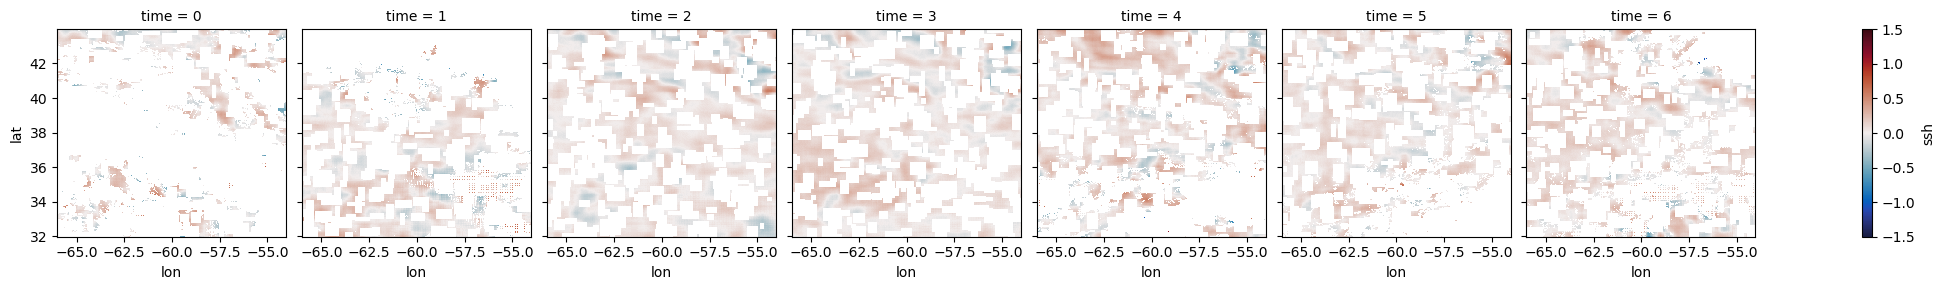

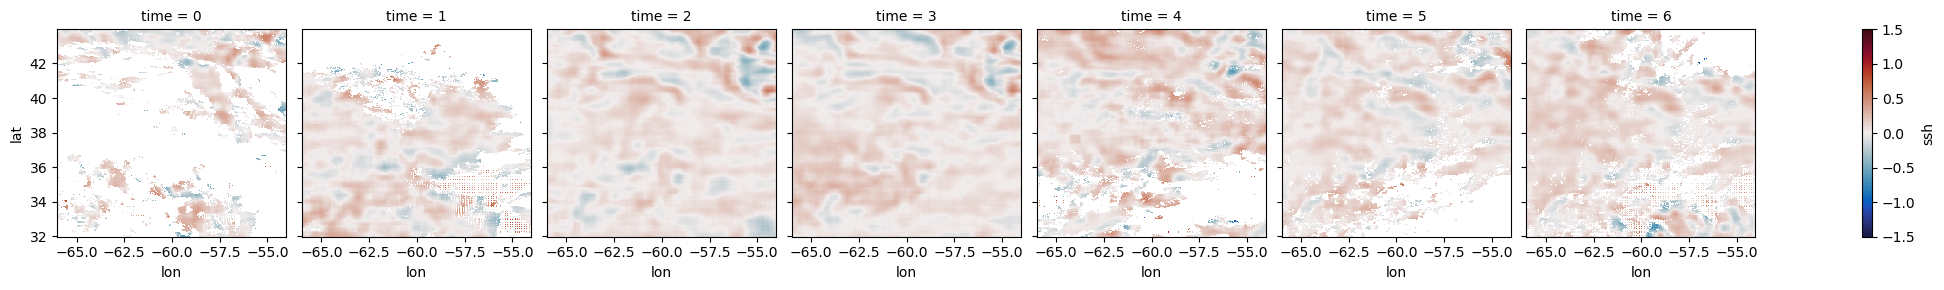

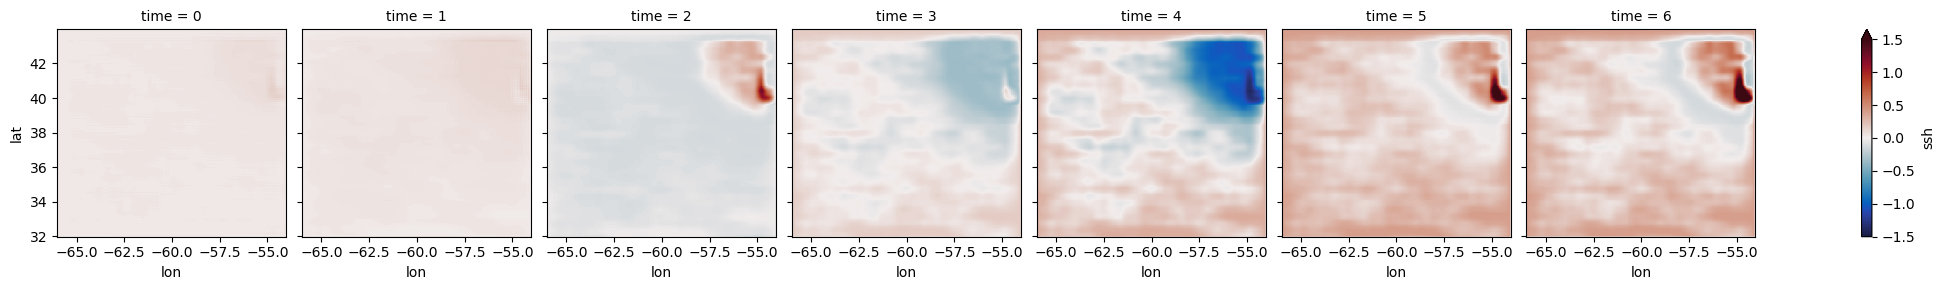

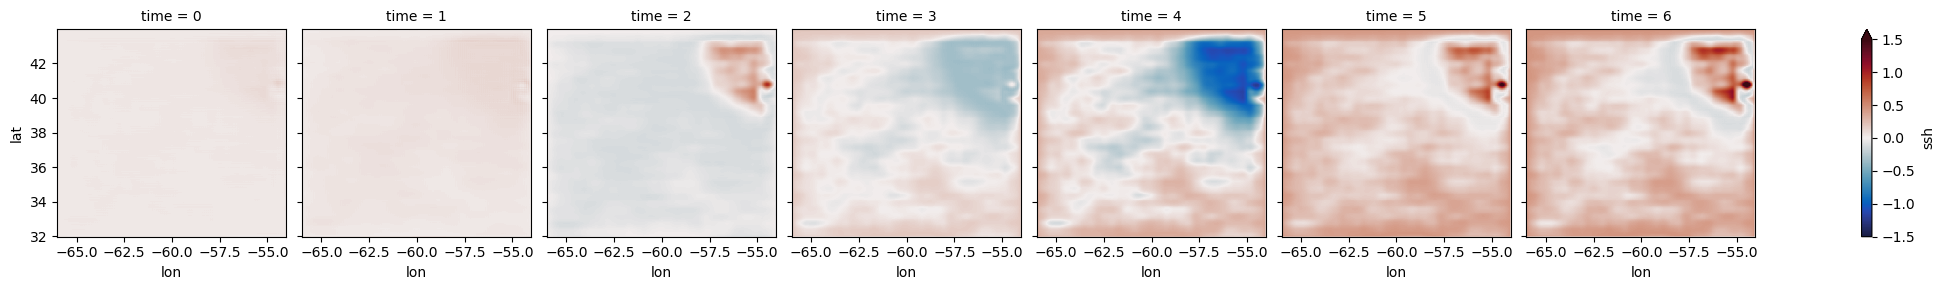

tensor(0.0837, device='cuda:0', grad_fn=<MeanBackward0>) tensor(6.0018, device='cuda:0', grad_fn=<StdBackward0>)


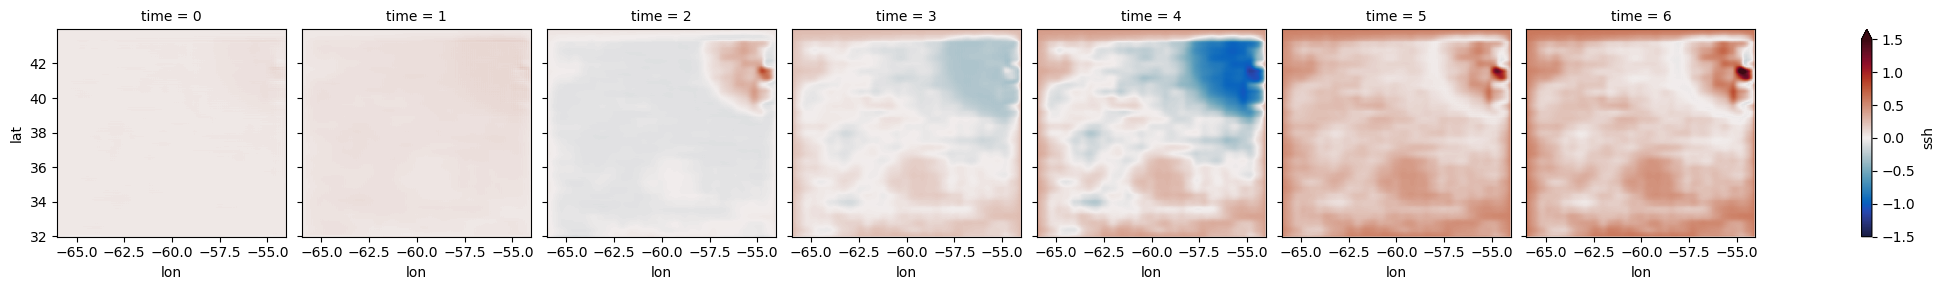

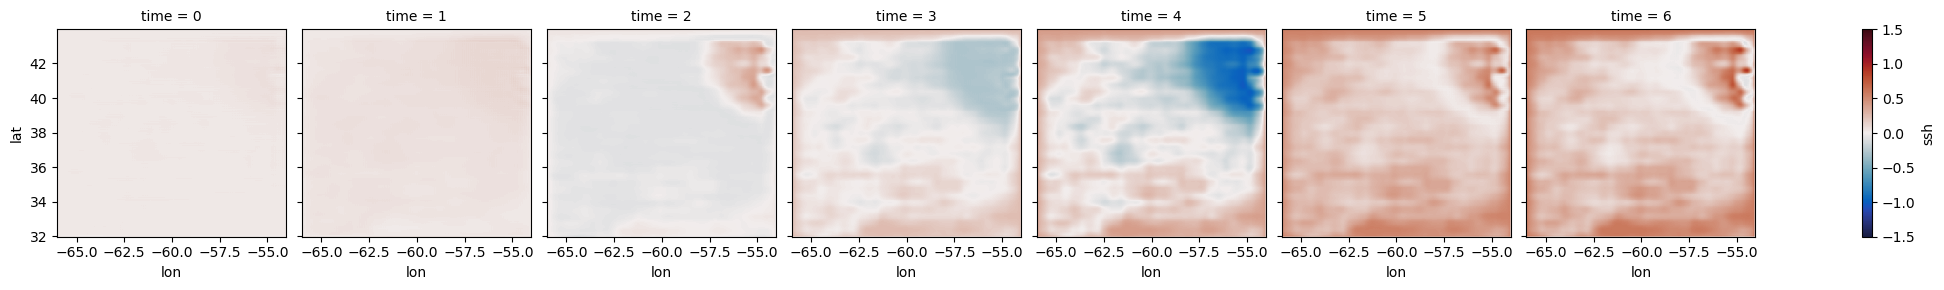

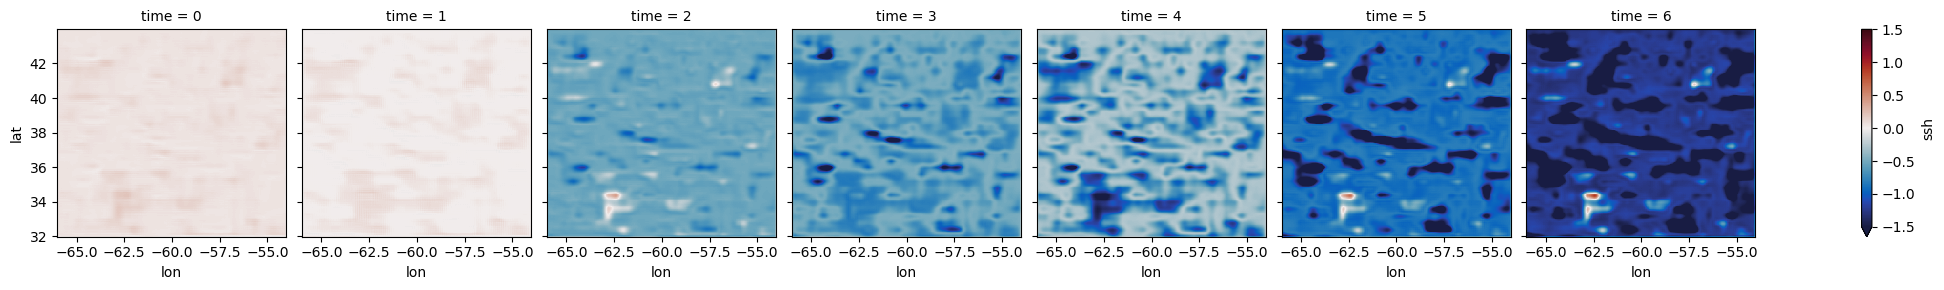

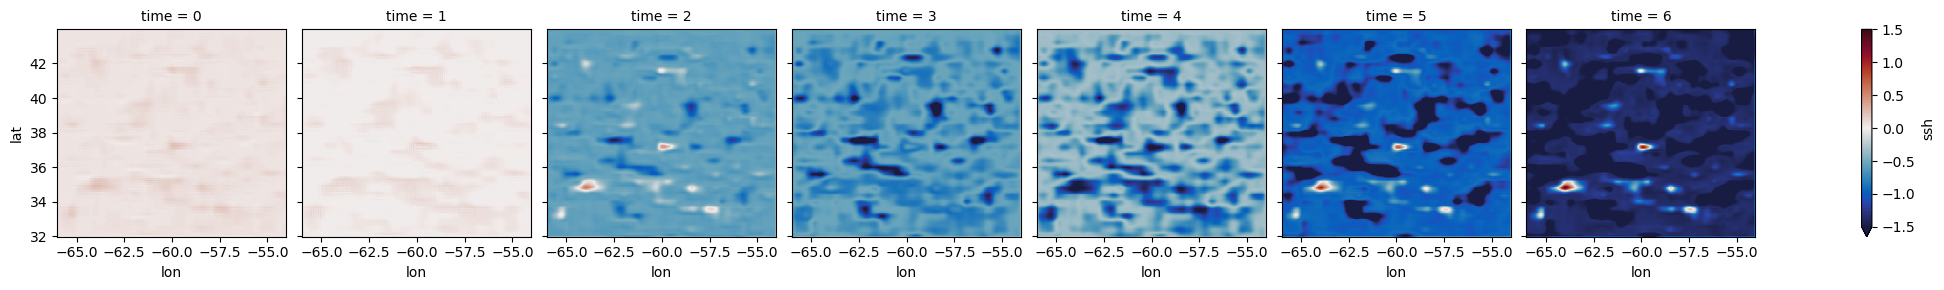

In [25]:
nt = 7

import cmocean as cmo
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),torch.where(y==0,np.nan,y).detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

import cmocean as cmo
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),torch.where(x==0,np.nan,x).detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

# obs-based
y = y.nan_to_num().to(device)
geo = torch.stack((batch.latv[:,0].nan_to_num(),
                                  batch.lonv[:,0].nan_to_num(),
                                  batch.land_mask[:,0].nan_to_num(),
                                  batch.topo[:,0].nan_to_num(),
                                  batch.fg_std[:,0].nan_to_num()), dim=1).to(device)
inp = torch.cat((y, geo),dim=1).to(device)
z1, mean, log_var = vae.encoder(inp)
x_hat = vae.decoder(z1)
xr_plt = xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)})
xr_plt.ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

z2, mean, log_var = vae.encoder(inp)
x_hat = vae.decoder(z2)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

print(torch.mean(z2-z1),torch.std(z2-z1))
# full obs-based
x = x.nan_to_num().to(device)
inp = torch.cat((x, geo),dim=1).to(device)
z, mean, log_var = vae.encoder(inp)
x_hat = vae.decoder(z)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

z, mean, log_var = vae.encoder(inp)
x_hat = vae.decoder(z)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

# pure generation
z = torch.Tensor(np.random.normal(size=z.size(), scale=1.0)).to(device)
x_hat = vae.decoder(z)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

z = torch.Tensor(np.random.normal(size=z.size(), scale=1.0)).to(device)
x_hat = vae.decoder(z)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

# AE training

In [12]:
ckpt = torch.load('/homes/m19beauc/4dvarnet-starter/ckpt/DMI/ckpt_ae_dmi.pth', map_location=device)
ae.load_state_dict(ckpt)

RuntimeError: Error(s) in loading state_dict for AE:
	size mismatch for decoder.0.weight: copying a param with shape torch.Size([4, 25, 1, 1]) from checkpoint, the shape in current model is torch.Size([4, 50, 1, 1]).

In [34]:
#@title Training (double click to expand or collapse)

from IPython.display import clear_output
from torch.optim import Adam
from tqdm.autonotebook import tqdm
from kornia.filters import box_blur

n_epochs =  1000#@param {'type':'integer'}
## learning rate
lr = 1e-4 #@param {'type':'number'}

optimizer = Adam(
        [
            {"params": ae.parameters(), "lr": lr}
        ],
    )

tqdm_epoch = tqdm(range(n_epochs))
for epoch in tqdm_epoch:
  avg_loss = 0.
  num_items = 0
  for batch in data_loader:
    y = batch[0]
    x = batch[1]
    if x.isfinite().float().mean() < 0.8:
        continue
    y = y.nan_to_num().to(device)
    geo = torch.stack((batch.latv[:,0].nan_to_num(),
                                  batch.lonv[:,0].nan_to_num(),
                                  batch.land_mask[:,0].nan_to_num(),
                                  batch.topo[:,0].nan_to_num(),
                                  batch.fg_std[:,0].nan_to_num()), dim=1).to(device)
    inp = torch.cat((y, geo),dim=1)
    z = ae.encoder(inp)
    x_hat = ae.decoder(z)
    loss_ae = ae.ae_loss(x.to(device), x_hat)
    loss = loss_ae
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    avg_loss += loss.item() * x.shape[0]
    num_items += x.shape[0]
  # Print the averaged training loss so far.
  tqdm_epoch.set_description('Average Loss: {:5f}'.format(avg_loss / num_items))
  # Update the checkpoint after each epoch of training.
  torch.save(ae.state_dict(), '../../ckpt/DMI/ckpt_ae_dmi.pth')

Average Loss: 0.096064:   0%|                | 4/1000 [01:31<6:20:18, 22.91s/it]


KeyboardInterrupt: 

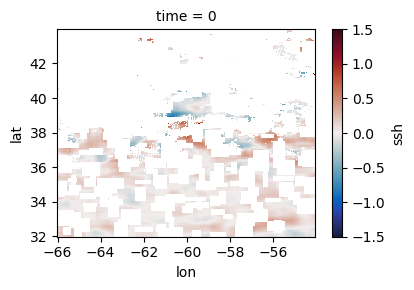

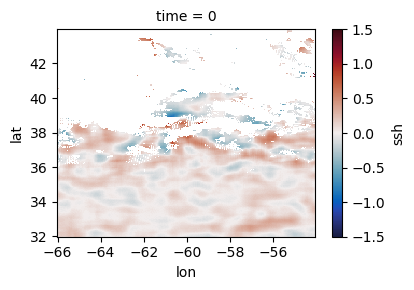

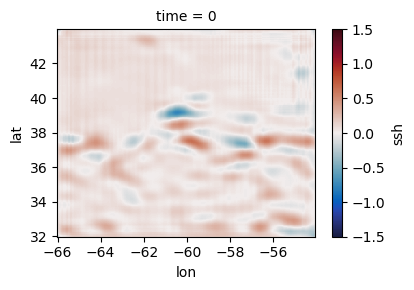

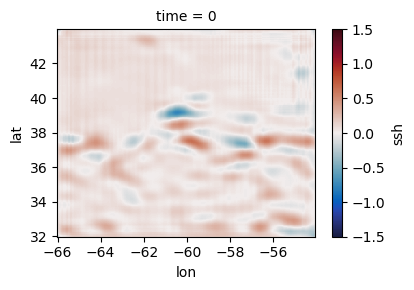

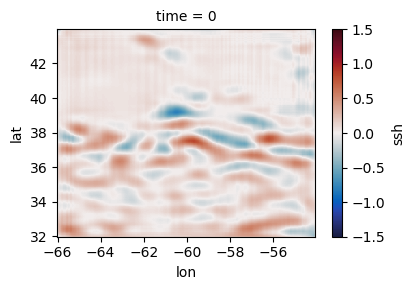

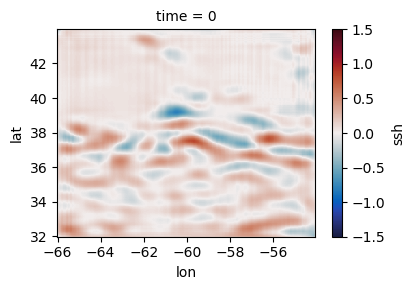

In [35]:
nt = 1

import cmocean as cmo
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),torch.where(y==0,np.nan,y).detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

import cmocean as cmo
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),torch.where(x==0,np.nan,x).detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

# obs-based
y = y.nan_to_num().to(device)
geo = torch.stack((batch.latv[:,0].nan_to_num(),
                                  batch.lonv[:,0].nan_to_num(),
                                  batch.land_mask[:,0].nan_to_num(),
                                  batch.topo[:,0].nan_to_num(),
                                  batch.fg_std[:,0].nan_to_num()), dim=1).to(device)
inp = torch.cat((y, geo),dim=1).to(device)
z1 = ae.encoder(inp)
x_hat = ae.decoder(z1)
xr_plt = xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)})
xr_plt.ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

z2 = ae.encoder(inp)#+1
x_hat = ae.decoder(z2)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

# full obs-based
x = x.nan_to_num().to(device)
inp = torch.cat((x, geo),dim=1).to(device)
z = ae.encoder(inp)
x_hat = ae.decoder(z)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

z = ae.encoder(inp)
x_hat = ae.decoder(z)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

# OLD

In [12]:
class VAE(nn.Module):
    def __init__(self, input_shape, z_dim):
        super().__init__()

        self.dim_in = input_shape[0]
        self.z_dim = z_dim
        self.input_shape = input_shape

        # encoder
        self.encoder_conv = nn.Sequential(
            nn.Conv2d(self.dim_in, 30, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(30, 60, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(60, 120, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_out_size = self._get_conv_out_size(input_shape)
        self.mu = nn.Sequential(
            nn.Linear(self.conv_out_size, z_dim),
            nn.LeakyReLU(),
            nn.Dropout(0.2)
        )

        self.log_var = nn.Sequential(
            nn.Linear(self.conv_out_size, z_dim),
            nn.LeakyReLU(),
            nn.Dropout(0.2)
        )

        # decoder
        self.decoder_linear = nn.Sequential(
            nn.Linear(z_dim, self.conv_out_size),
            nn.LeakyReLU(),
            nn.Dropout(0.2)
        )

        self.decoder_conv = nn.Sequential(
            nn.ConvTranspose2d(120, 60, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(60, 30, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(30, self.dim_in-5, 3, stride=2, padding=1, output_padding=1)
        )
        
    def encode(self, x):
        
        x = self.encoder_conv(x)
        x = x.view(x.size()[0], -1)
        mu_p = self.mu(x)
        log_var_p = self.log_var(x)
        return mu_p, log_var_p

    def reparametrization(self, mu, log_var):
        epsilon = torch.Tensor(np.random.normal(size=(self.z_dim), scale=1.0))
        epsilon = epsilon.to(mu.device)
        return mu + epsilon * torch.exp(log_var / 2)
    
    def encoder(self,x):
        mean, log_var = self.encode(x)
        z = self.reparametrization(mean, log_var)
        return z, mean, log_var

    def decode(self, x):
        x = self.decoder_linear(x)
        x = x.view(x.size()[0], *self.conv_out_shape[1:])
        x = self.decoder_conv(x)
        return x

    def decoder(self, x):
        x = self.decode(x)
        return x

    def forward(self, x):
        mu_p, log_var_p = self.encode(x)
        x = self.reparametrization(mu_p, log_var_p)
        images_p = self.decode(x)
        return mu_p, log_var_p, images_p

    def project_latent_space(self,x):
        mu_p, log_var_p = self.encode(x)
        x = self.reparametrization(mu_p, log_var_p)
        return x

    
    def vae_loss(self, x, x_hat, mean, log_var, wKL=.01):
        err = x_hat-x
        err_grad = sobel(x_hat)-sobel(x)
        mask = torch.isnan(err)
        mask_grad = torch.isnan(err_grad)
        zeros= torch.zeros(err.size()).to(device)
        
        
        reproduction_loss = nn.functional.mse_loss(err[~mask], zeros[~mask], reduction='mean')
        #reproduction_loss = nn.functional.l1_loss(err[~mask], zeros[~mask], reduction='mean')

        #log_sigma_opt = 0.5 * reproduction_loss.log()
        grad_reproduction_loss = nn.functional.mse_loss(err_grad[~mask_grad], zeros[~mask_grad], reduction='mean')
        #log_sigma_opt_grad = 0.5 * grad_reproduction_loss.log()
        
        #reproduction_loss = 0.5 * torch.pow(err[~mask]/log_sigma_opt.exp(), 2) + log_sigma_opt
        #reproduction_loss = reproduction_loss.sum()
        #grad_reproduction_loss = 0.5 * torch.pow(err_grad[~mask]/log_sigma_opt_grad.exp(), 2) + log_sigma_opt_grad
        #grad_reproduction_loss = grad_reproduction_loss.sum()        
        
        KLD = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())
        #return reproduction_loss + 100.*grad_reproduction_loss + wKL*KLD, reproduction_loss, KLD
        return reproduction_loss  + wKL*KLD, reproduction_loss, KLD
        #return reproduction_loss, reproduction_loss, KLD

    def _get_conv_out_size(self, shape):
        out = self.encoder_conv(torch.zeros(1, *shape))
        self.conv_out_shape = out.size()
        return int(np.prod(self.conv_out_shape))
  
vae = VAE(input_shape=(1+5,240,240), z_dim=200).to(device)